# Import Libraries

In [10]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [11]:
df = pd.read_csv('C:\\Users\\SHEIKH RAAZ\\Downloads\\archive (3)\\spam.csv', delimiter=',',encoding='latin-1') #Call to the data
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True) #Dropping not useable columns
df.sample(10) #random 10 rows

,v1,v2
3722,ham,We left already we at orchard now.
21,ham,IÛ÷m going to try for 2 months ha ha only joking
2193,ham,I called but no one pick up e phone. I ask bot...
5090,ham,"St andre, virgil's cream"
4512,spam,Money i have won wining number 946 wot do i do...
4899,spam,"ou are guaranteed the latest Nokia Phone, a 40..."
1108,ham,No you'll just get a headache trying to figure...
5001,ham,You still around? Looking to pick up later
1703,ham,Just taste fish curry :-P
3817,spam,74355 XMAS iscoming & ur awarded either å£500 ...


# data Analysis

In [12]:
df.info() #Info of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Preprocessing

In [13]:
df["v1"] = (df["v1"] == "spam").astype(int)

In [14]:
x, y=df['v2'].values,df['v1'].values

In [15]:
x = x.tolist()
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x)


# SPLITTING

In [16]:
train_x,test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

# KNN

In [17]:
knn_model = KNeighborsClassifier()
knn_model.fit(train_x, train_y)

test_pre = knn_model.predict(test_x)

# RESULTS

In [18]:
print(classification_report(test_y, test_pre))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       957
           1       1.00      0.39      0.56       158

    accuracy                           0.91      1115
   macro avg       0.95      0.69      0.75      1115
weighted avg       0.92      0.91      0.90      1115



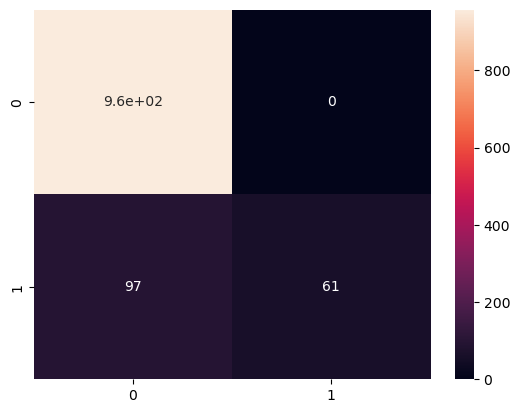

In [19]:
sns.heatmap(confusion_matrix(test_y, test_pre), annot=True)
plt.show()